# EDA 
##### part 2

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
regents = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/2014-15-to-2022-23-nyc-regents-overall-and-by-category---public 2.csv", low_memory=False)
attendance = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/2016-17_-_2020-21_End-of-Year_Borough_Attendance_and_Chronic_Absenteeism_Data_20250625 (1).csv")
demographic = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/2019-20_Demographic_Snapshot_-_Borough_20250625.csv")
graduation = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/Graduation_results_for_Cohorts_2012_to_2019__Classes_of_2016_to_2023__20250625.csv", low_memory=False)

# Regents

In [77]:
regents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372177 entries, 0 to 372176
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype 
---  ------                                         --------------   ----- 
 0   School DBN                                     372177 non-null  object
 1   School Name                                    372177 non-null  object
 2   School Type                                    372177 non-null  object
 3   School Level                                   372177 non-null  object
 4   Regents Exam                                   372177 non-null  object
 5   Year                                           372177 non-null  object
 6   Category                                       372176 non-null  object
 7   Total Tested                                   372177 non-null  object
 8   Mean Score                                     372177 non-null  object
 9   Number Scoring Below 65                        3

In [78]:
# Columns to convert to numeric
score_columns = [
    'Total Tested', 'Mean Score',
    'Number Scoring Below 65', 'Percent Scoring Below 65',
    'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
    'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
    'Number meeting CUNY proficiency requirmenets',
    'Percent meeting CUNY proficiency requirmenets'
]

# Convert with errors coerced to NaN
for col in score_columns:
    regents[col] = pd.to_numeric(regents[col], errors='coerce')

In [79]:
regents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372177 entries, 0 to 372176
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   School DBN                                     372177 non-null  object 
 1   School Name                                    372177 non-null  object 
 2   School Type                                    372177 non-null  object 
 3   School Level                                   372177 non-null  object 
 4   Regents Exam                                   372177 non-null  object 
 5   Year                                           372177 non-null  object 
 6   Category                                       372176 non-null  object 
 7   Total Tested                                   372173 non-null  float64
 8   Mean Score                                     242755 non-null  float64
 9   Number Scoring Below 65              

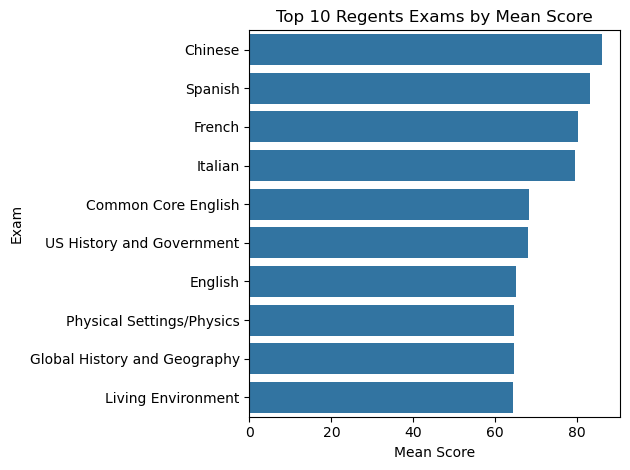

In [80]:
# Group and average
mean_scores = regents.groupby('Regents Exam')['Mean Score'].mean().sort_values(ascending=False)

# Plot top 10 exams by mean score
sns.barplot(x=mean_scores.head(10), y=mean_scores.head(10).index)
plt.title('Top 10 Regents Exams by Mean Score')
plt.xlabel('Mean Score')
plt.ylabel('Exam')
plt.tight_layout()
plt.show()

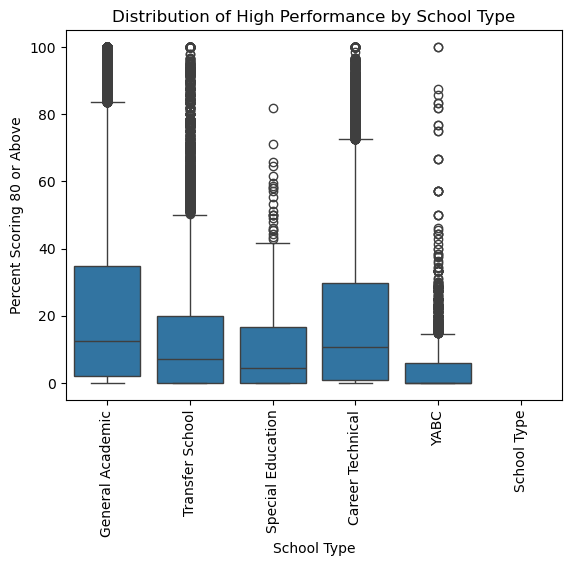

In [108]:
sns.boxplot(data=regents, x='School Type', y='Percent Scoring 80 or Above')
plt.title('Distribution of High Performance by School Type')
plt.xticks(rotation=90)
plt.show()


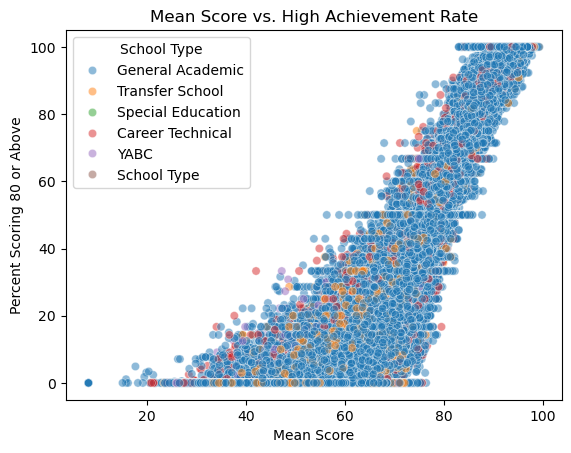

In [138]:
sns.scatterplot(data=regents, x='Mean Score', y='Percent Scoring 80 or Above', hue='School Type', alpha=0.5)
plt.title('Mean Score vs. High Achievement Rate')
plt.show()

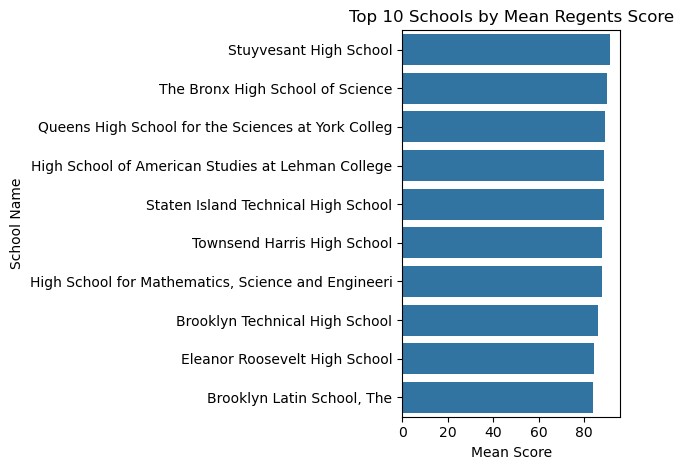

In [139]:
top_schools = (regents.groupby('School Name')['Mean Score'].mean().sort_values(ascending=False).head(10))
sns.barplot(x=top_schools.values, y=top_schools.index)
plt.title('Top 10 Schools by Mean Regents Score')
plt.xlabel('Mean Score')
plt.ylabel('School Name')
plt.tight_layout()
plt.show()


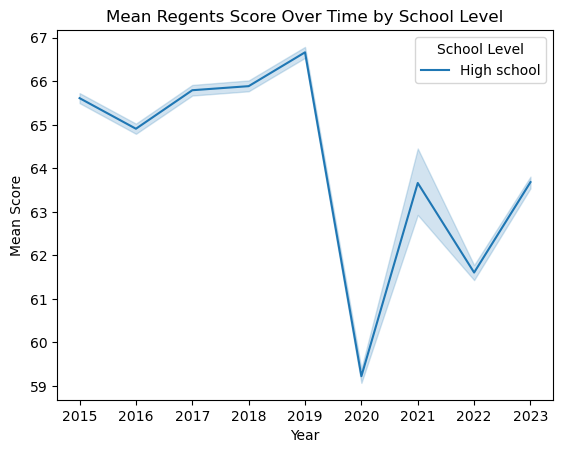

In [140]:
# Drop nulls and make a copy safely
df_filtered = regents.dropna(subset=['Year', 'Mean Score']).copy()

# Convert Year to integer
df_filtered['Year'] = df_filtered['Year'].astype(int)
sns.lineplot(data=df_filtered, x='Year', y='Mean Score', hue='School Level', estimator='mean')
plt.title('Mean Regents Score Over Time by School Level')
plt.ylabel('Mean Score')
plt.show()

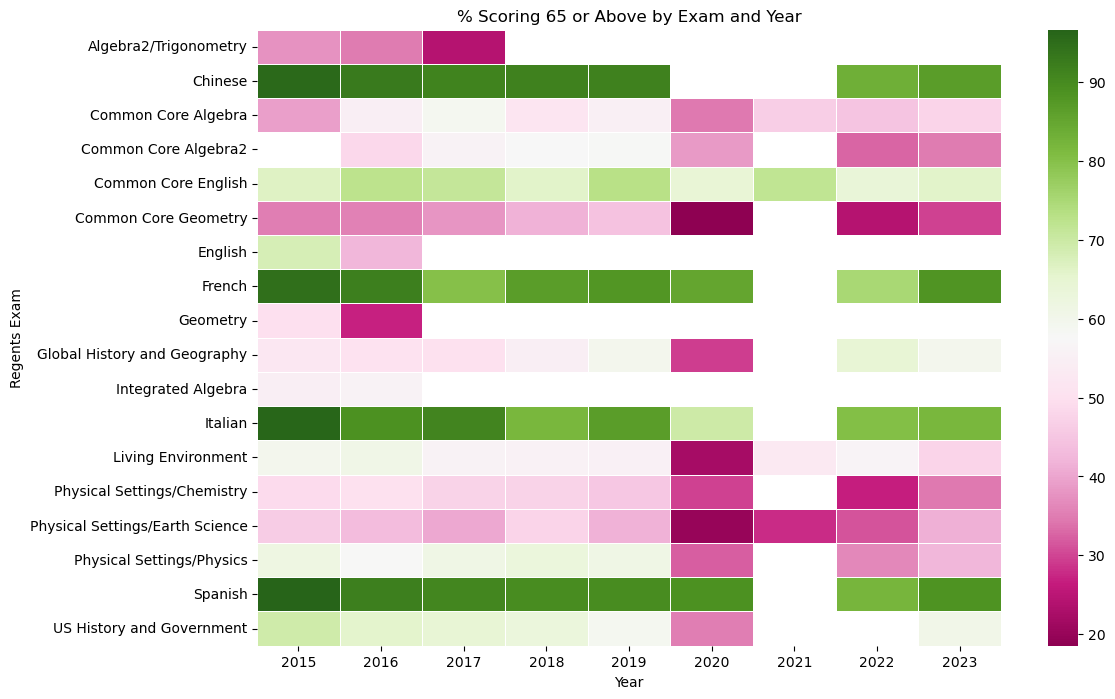

In [143]:
# Pivot for heatmap
pivot = regents.pivot_table(index='Regents Exam', columns='Year', values='Percent Scoring 65 or Above', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='PiYG', annot=False, linewidths=0.5)
plt.title('% Scoring 65 or Above by Exam and Year')
plt.xlabel('Year')
plt.ylabel('Regents Exam')
plt.show()


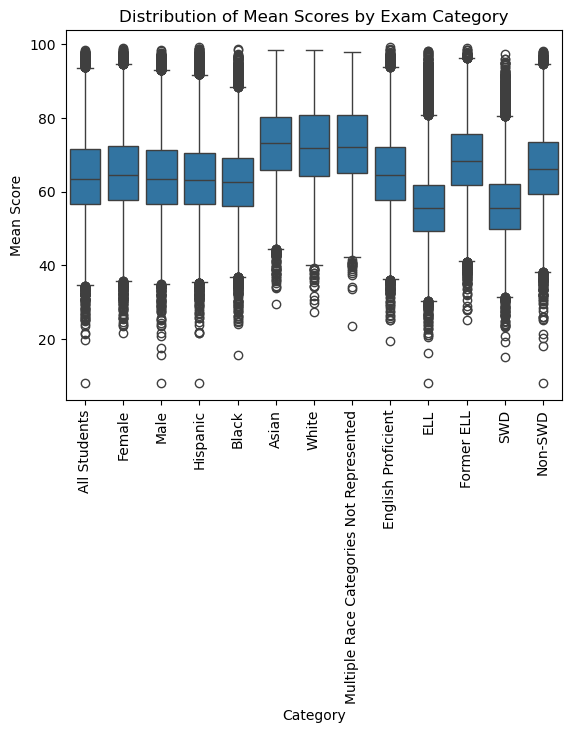

In [144]:
df_box = regents.dropna(subset=['Mean Score'])

sns.boxplot(data=df_box, x='Category', y='Mean Score')
plt.title('Distribution of Mean Scores by Exam Category')
plt.xticks(rotation=90)
plt.show()


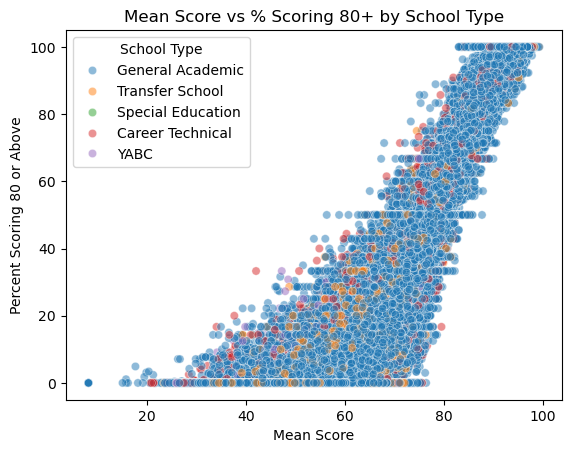

In [145]:
df_scatter = regents.dropna(subset=['Mean Score', 'Percent Scoring 80 or Above'])

sns.scatterplot(data=df_scatter, x='Mean Score', y='Percent Scoring 80 or Above', hue='School Type', alpha=0.5)
plt.title('Mean Score vs % Scoring 80+ by School Type')
plt.show()

# Attendance

In [89]:
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Borough                                        100 non-null    object 
 1   Grade                                          100 non-null    int64  
 2   Category                                       100 non-null    object 
 3   Year                                           100 non-null    object 
 4   # Total Days                                   100 non-null    int64  
 5   # Days Absent                                  100 non-null    int64  
 6   # Days Present                                 100 non-null    int64  
 7   % Attendance                                   100 non-null    float64
 8   # Contributing 10+ Total Days and 1+ Pres Day  100 non-null    int64  
 9   # Chronically Absent                           100 non-

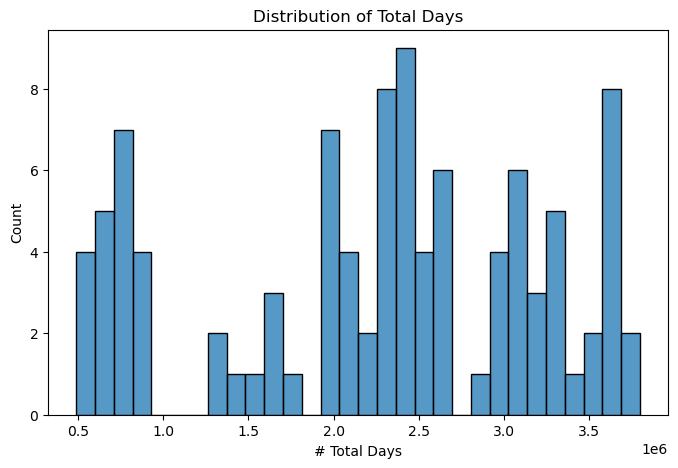

In [90]:
plt.figure(figsize=(8,5))
sns.histplot(data=attendance, x="# Total Days", bins=30, kde=False)
plt.title("Distribution of Total Days")
plt.xlabel("# Total Days")
plt.ylabel("Count")
plt.show()

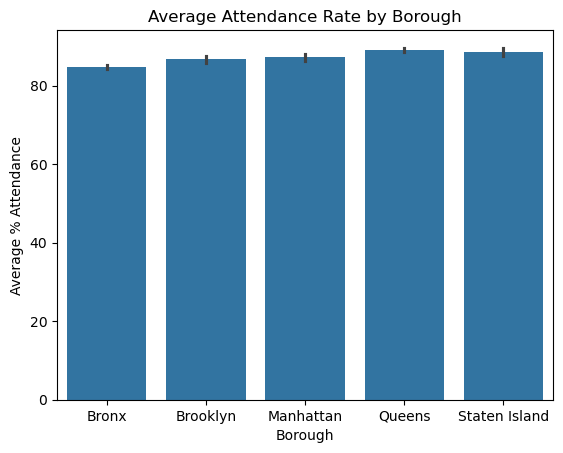

In [112]:
sns.barplot(data=attendance, x='Borough', y='% Attendance', estimator='mean')
plt.title('Average Attendance Rate by Borough')
plt.ylabel('Average % Attendance')
plt.show()

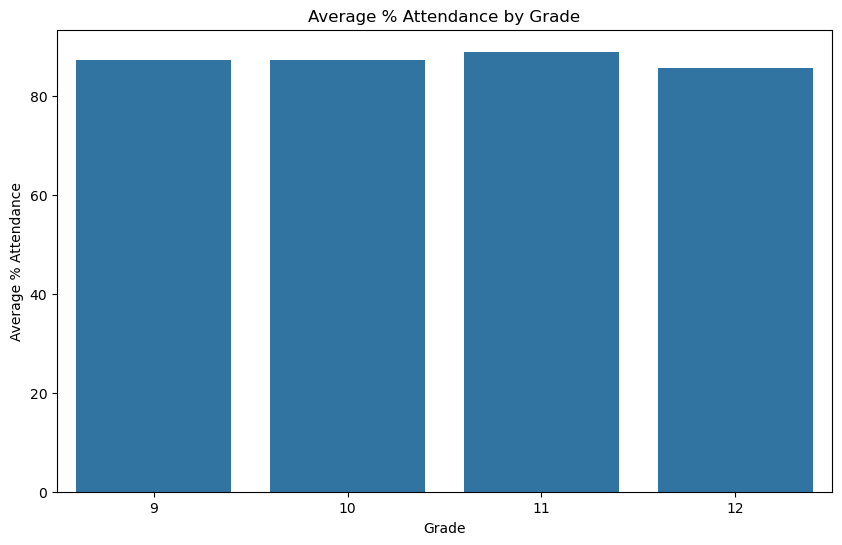

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(data=attendance, x="Grade", y="% Attendance", errorbar=None, order=sorted(attendance["Grade"].unique()))
plt.title("Average % Attendance by Grade")
plt.xlabel("Grade")
plt.ylabel("Average % Attendance")
plt.show()

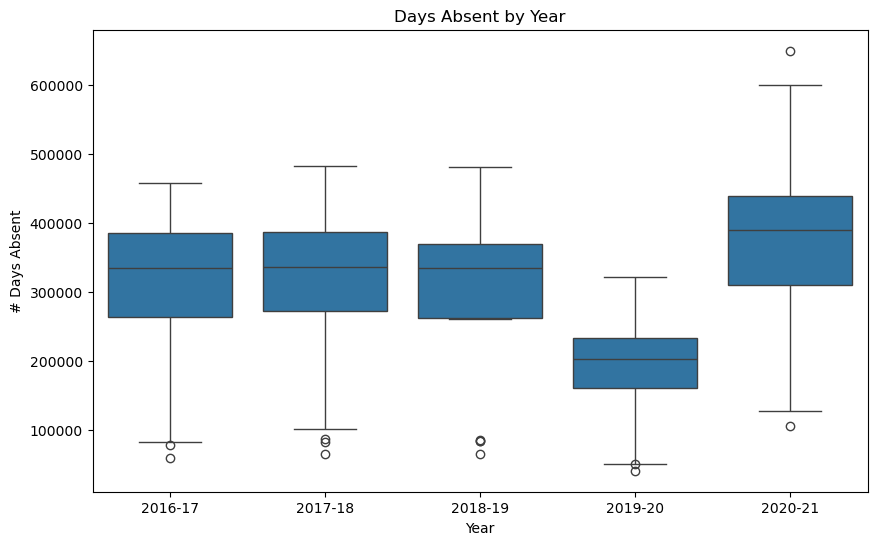

In [93]:
plt.figure(figsize=(10,6))
sns.boxplot(data=attendance, x="Year", y="# Days Absent")
plt.title("Days Absent by Year")
plt.xlabel("Year")
plt.ylabel("# Days Absent")
plt.show()

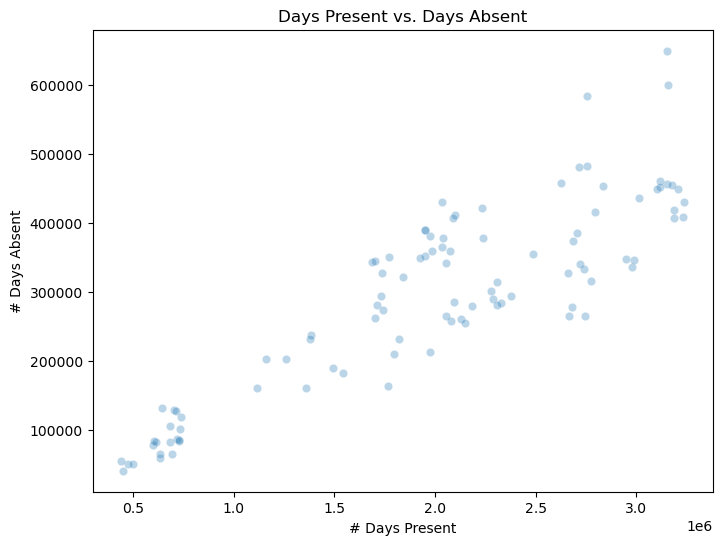

In [94]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=attendance, x="# Days Present", y="# Days Absent", alpha=0.3)
plt.title("Days Present vs. Days Absent")
plt.xlabel("# Days Present")
plt.ylabel("# Days Absent")
plt.show()

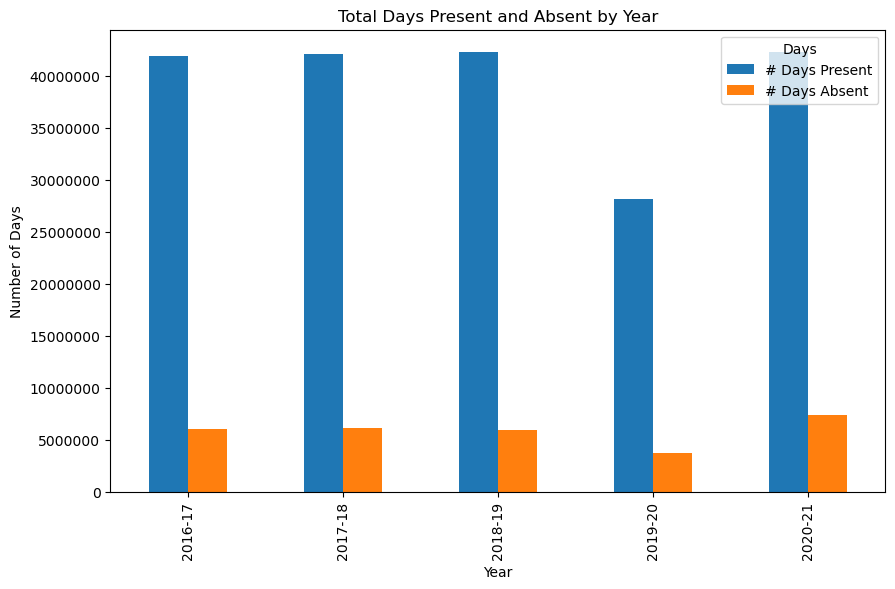

In [95]:
import matplotlib.ticker as mtick
agg_df = attendance.groupby("Year")[["# Total Days", "# Days Absent", "# Days Present"]].sum()
ax = agg_df[["# Days Present", "# Days Absent"]].plot(kind="bar", stacked=False, figsize=(10,6))

# Disable scientific notation on y-axis
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title("Total Days Present and Absent by Year")
plt.xlabel("Year")
plt.ylabel("Number of Days")
plt.legend(title="Days")
plt.show()


In [96]:
attendance['Grade'].value_counts()

Grade
10    25
11    25
12    25
9     25
Name: count, dtype: int64

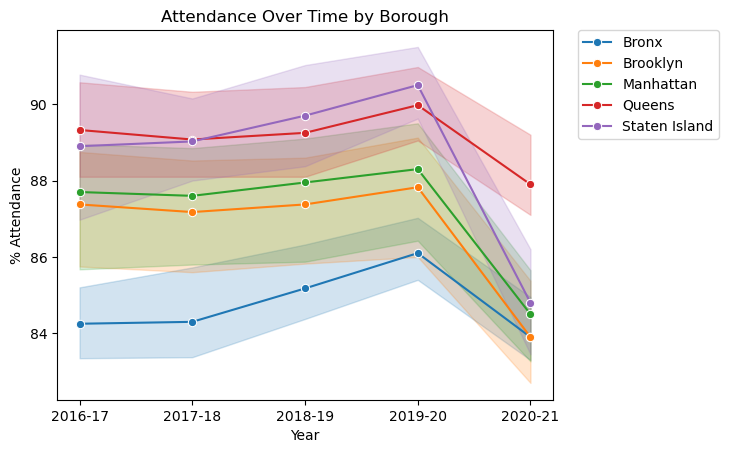

In [131]:
attendance['Year'] = attendance['Year'].astype(str)
sns.lineplot(data=attendance, x='Year', y='% Attendance', hue='Borough', marker='o')
plt.title('Attendance Over Time by Borough')
plt.ylabel('% Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)
plt.show()

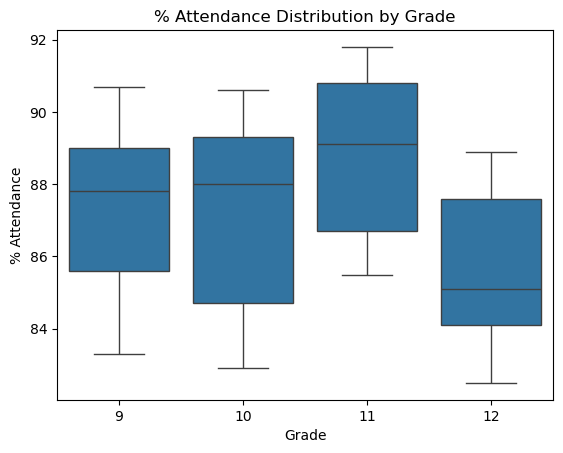

In [98]:
sns.boxplot(data=attendance, x='Grade', y='% Attendance')
plt.title('% Attendance Distribution by Grade')
plt.show()

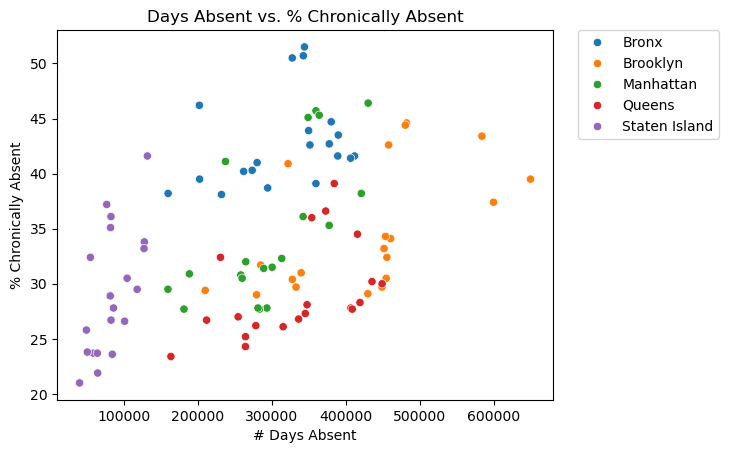

In [132]:
sns.scatterplot(data=attendance, x='# Days Absent', y='% Chronically Absent', hue='Borough')
plt.title('Days Absent vs. % Chronically Absent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)
plt.show()

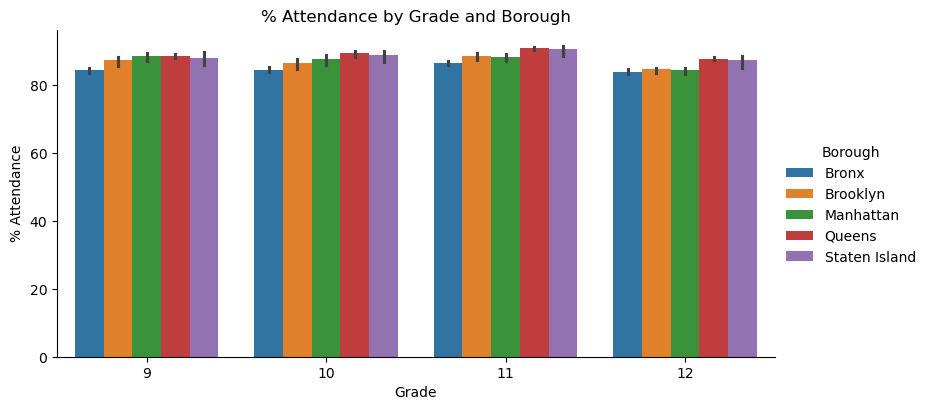

In [129]:
sns.catplot(data=attendance, x='Grade', y='% Attendance', hue='Borough', kind='bar', height=4, aspect=2)
plt.title('% Attendance by Grade and Borough')
plt.show()

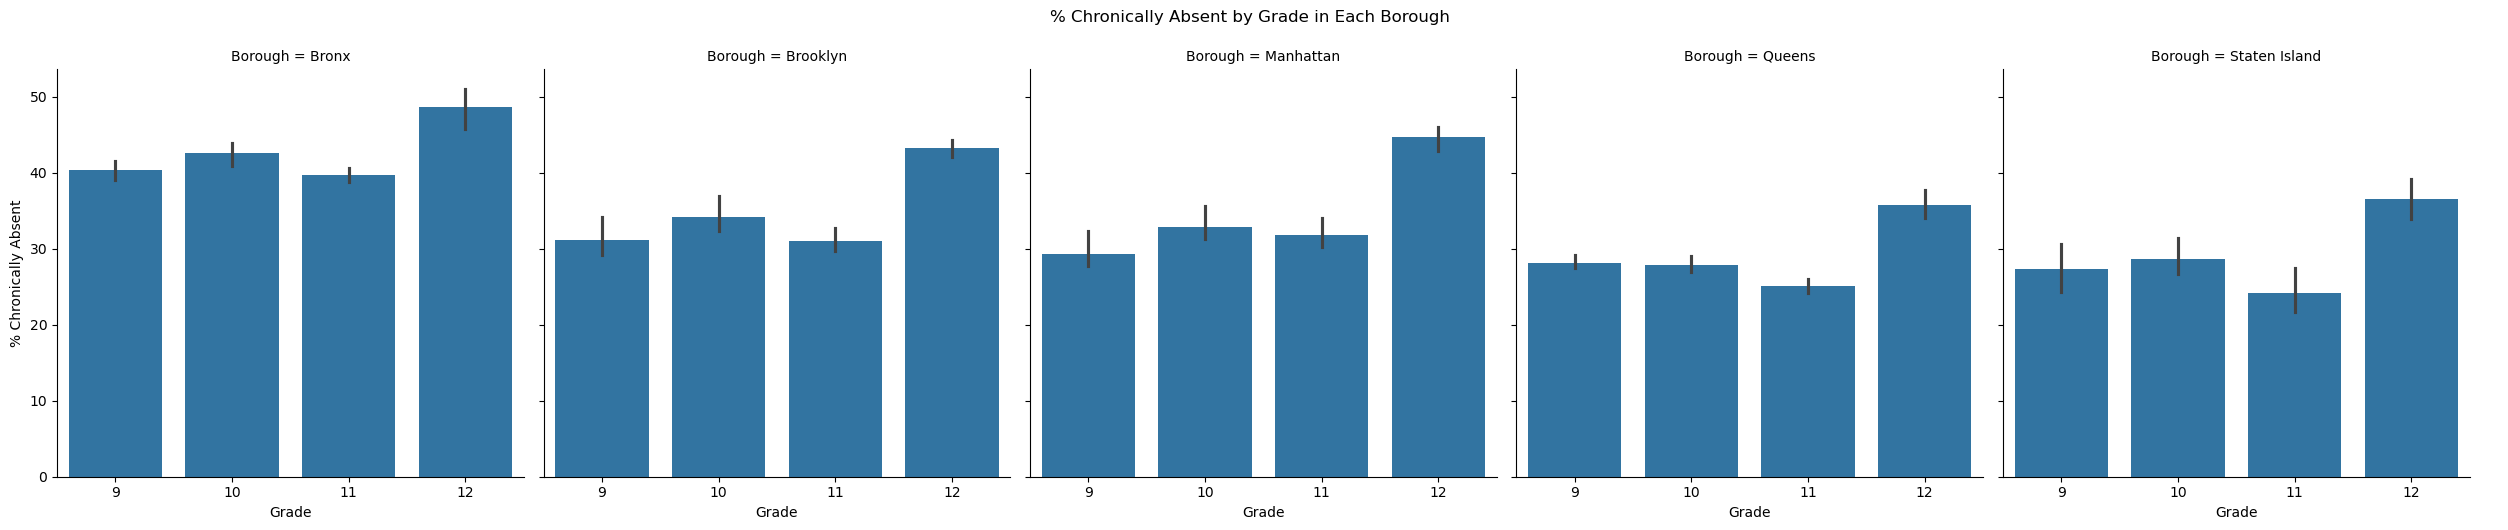

In [121]:
by_borough = sns.catplot(data=attendance, x='Grade', y='% Chronically Absent', col='Borough', kind='bar')
by_borough.fig.suptitle('% Chronically Absent by Grade in Each Borough', y=1.05)
plt.show()


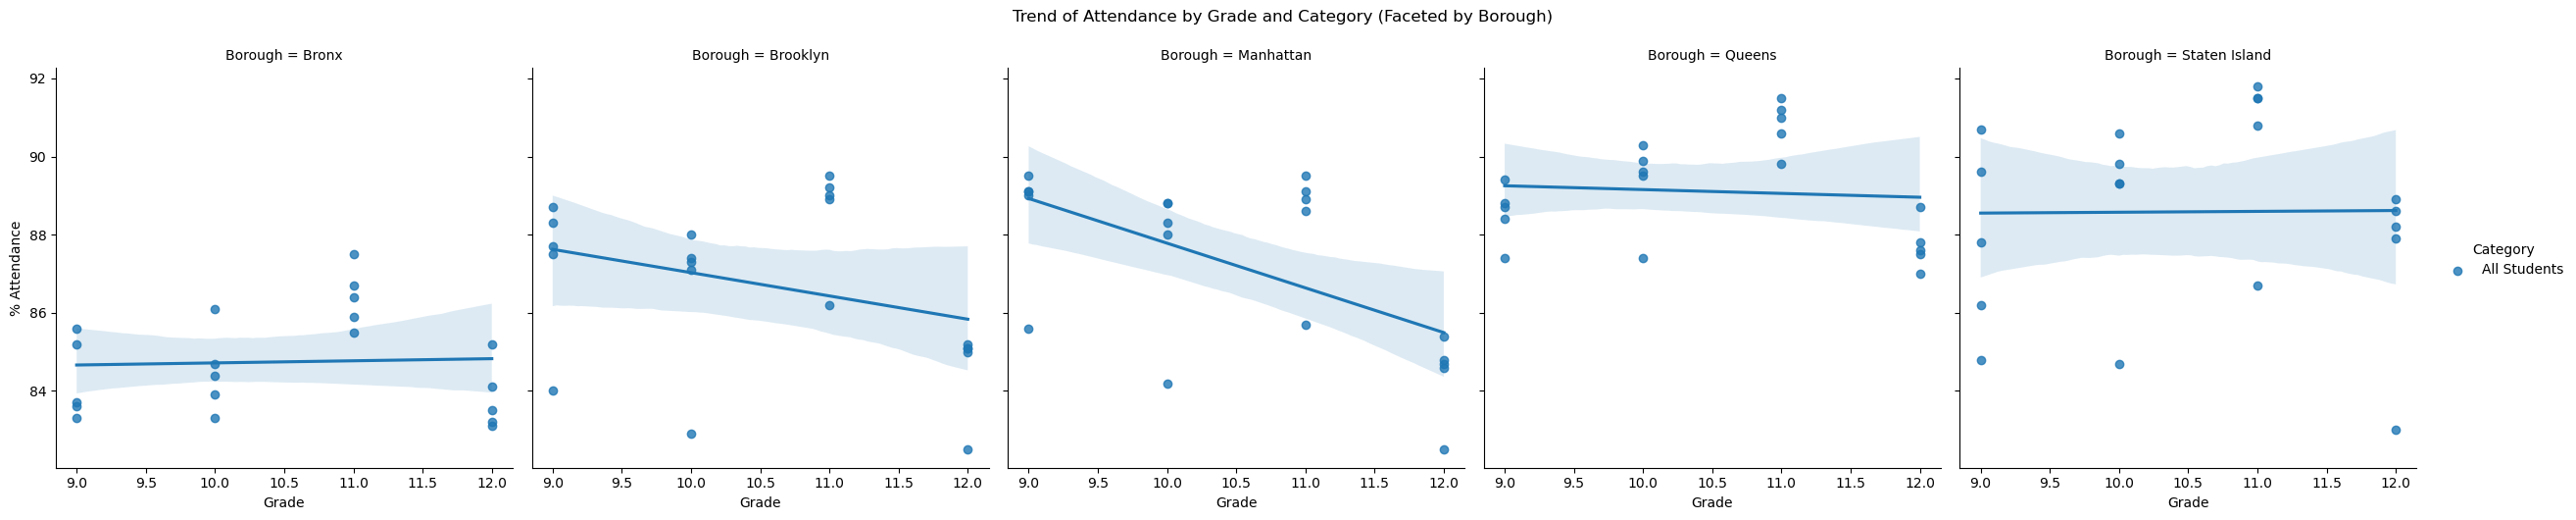

In [122]:
sns.lmplot(data=attendance, x='Grade', y='% Attendance', hue='Category', col='Borough', markers='o')
plt.suptitle('Trend of Attendance by Grade and Category (Faceted by Borough)', y=1.05)
plt.show()


# Demographics

In [103]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Borough                                     25 non-null     object 
 1   Year                                        25 non-null     object 
 2   Total Enrollment                            25 non-null     int64  
 3   Grade 3K+PK (Half Day & Full Day)           25 non-null     int64  
 4   Grade K                                     25 non-null     int64  
 5   Grade 1                                     25 non-null     int64  
 6   Grade 2                                     25 non-null     int64  
 7   Grade 3                                     25 non-null     int64  
 8   Grade 4                                     25 non-null     int64  
 9   Grade 5                                     25 non-null     int64  
 10  Grade 6         

# Graduation

In [104]:
graduation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321002 entries, 0 to 321001
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Report Category                       321002 non-null  object
 1   Geographic Subdivision                321002 non-null  object
 2   School Name                           294543 non-null  object
 3   Category                              321002 non-null  object
 4   Cohort Year                           321002 non-null  int64 
 5   Cohort                                320163 non-null  object
 6   # Total Cohort                        321002 non-null  int64 
 7   # Grads                               321002 non-null  object
 8   % Grads                               321002 non-null  object
 9   # Total Regents                       320163 non-null  object
 10  % Total Regents of Cohort             320163 non-null  object
 11  % Total Regen

In [105]:
column = [col for col in graduation.columns if "#" in col or "%" in col]
for col in column:
  graduation[col] = pd.to_numeric(graduation[col], errors="coerce")
  if "#" in col:
    graduation[col] = graduation[col].astype("Int64")

In [106]:
graduation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321002 entries, 0 to 321001
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Report Category                       321002 non-null  object 
 1   Geographic Subdivision                321002 non-null  object 
 2   School Name                           294543 non-null  object 
 3   Category                              321002 non-null  object 
 4   Cohort Year                           321002 non-null  int64  
 5   Cohort                                320163 non-null  object 
 6   # Total Cohort                        321002 non-null  Int64  
 7   # Grads                               239314 non-null  Int64  
 8   % Grads                               239314 non-null  float64
 9   # Total Regents                       238529 non-null  Int64  
 10  % Total Regents of Cohort             238529 non-null  float64
 11  